### Створення моделі машинного навчання для прогнозування ціни на автомобілі

##### Імпорт необхідних бібліотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

##### Завантаження датасету Car_Price_Prediction

In [2]:
df = pd.read_csv('D:/MyPycharmProjects/My_Project_Car_Price_Prediction/car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


### Інформація про набір даних

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### Попередня обробка даних

***Пошук і видалення повторюваних рядків:***

In [6]:
df[df.duplicated()].shape

(313, 18)

In [7]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [8]:
print(f'Перед видаленням повторюваних рядків даний датасет містить {df.shape[0]} рядків та {df.shape[1]} стовпців.')

Перед видаленням повторюваних рядків даний датасет містить 19237 рядків та 18 стовпців.


In [9]:
df = df.drop_duplicates()
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [10]:
print(f'Після видалення повторюваних рядків даний датасет містить {df.shape[0]} рядків та {df.shape[1]} стовпців.')

Після видалення повторюваних рядків даний датасет містить 18924 рядків та 18 стовпців.


***Стандартизація найменувань стовпців:***

In [11]:
df.columns = df.columns.str.replace(' ','_')

In [12]:
df.columns.to_list()

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod._year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Engine_volume',
 'Mileage',
 'Cylinders',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

***Відображення унікальних значень усіх стовпців:***

In [13]:
for col in df:
    print("-----------------------------------------------------------------------------------")
    print(f'{col}: {df[col].unique()}')

-----------------------------------------------------------------------------------
ID: [45654403 44731507 45774419 ... 45804997 45793526 45813273]
-----------------------------------------------------------------------------------
Price: [13328 16621  8467 ... 56814 63886 22075]
-----------------------------------------------------------------------------------
Levy: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '2

***Пертворення усіх значень "-" на "0" у стовпці "Levy" а також перетворення типу даних у цілочисельний:***

In [14]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [15]:
df['Levy'] = df['Levy'].replace('-','0')

In [16]:
df['Levy']=pd.to_numeric(df['Levy'], errors='coerce')

In [17]:
df["Levy"].dtype

dtype('int64')

***Видалення 'turbo' після кожного значення у стовпці "Engine_volume" і перетворення типу даних у тип дійсних чисел:***

In [18]:
df['Engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [19]:
df['Engine_volume']=df['Engine_volume'].str.replace('Turbo','')

In [20]:
df['Engine_volume'] = df['Engine_volume'].astype(float)

In [21]:
df['Engine_volume'].dtype

dtype('float64')

***Видалення 'km' після кожного значення у стовпці "Mileage" і перетворення типу даних у цілочисельний:***

In [22]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [23]:
df['Mileage']=df['Mileage'].str.replace('km','')

In [24]:
df['Mileage']=df['Mileage'].astype('int64')
df['Mileage'].dtypes

dtype('int64')

***Перетворення значень '02-Mar' на '2-3', і '04-May' на '4-5' у стовпці "Door":***

In [25]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [26]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

In [27]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

### Аналіз даних

<Axes: xlabel='Levy', ylabel='Density'>

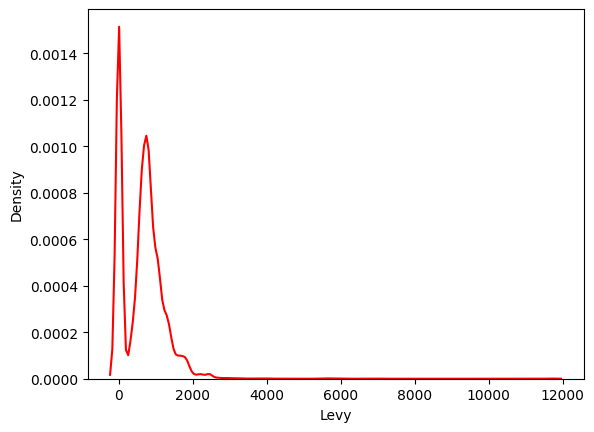

In [28]:
sns.kdeplot(df['Levy'], color='r')

Значення у стовпці "Levy" знаходяться в діапазоні 0 і 2000.

Text(0.5, 1.0, 'Number of each Category')

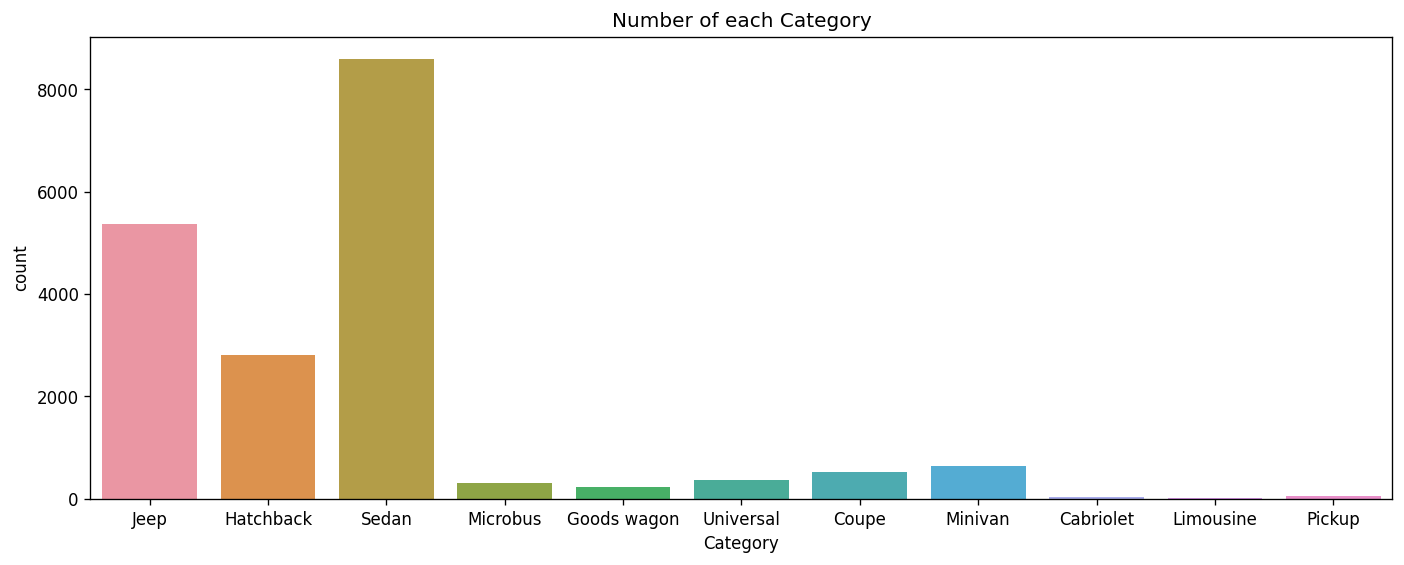

In [29]:
plt.subplots(figsize=(14,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("Number of each Category")

Із графіка видно, що у стовпці "Categories" найбільше автомобілів є типу Седан, Джип і Хетчбек.

<Axes: xlabel='Airbags', ylabel='Density'>

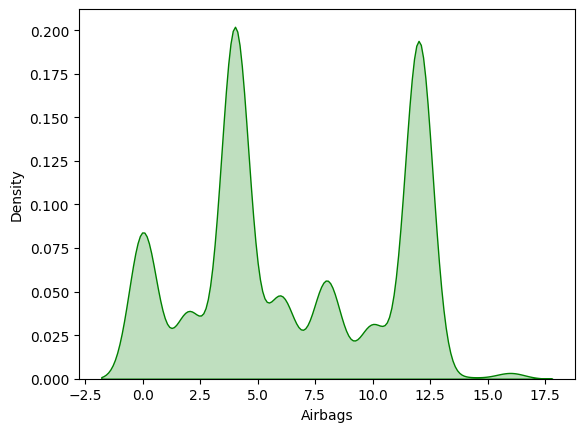

In [30]:
sns.kdeplot(df['Airbags'], color='g', shade=True)

У більшості автомобілів подушок безпеки є в межах 3-5 або 11-13. 

<Axes: xlabel='Prod._year', ylabel='Count'>

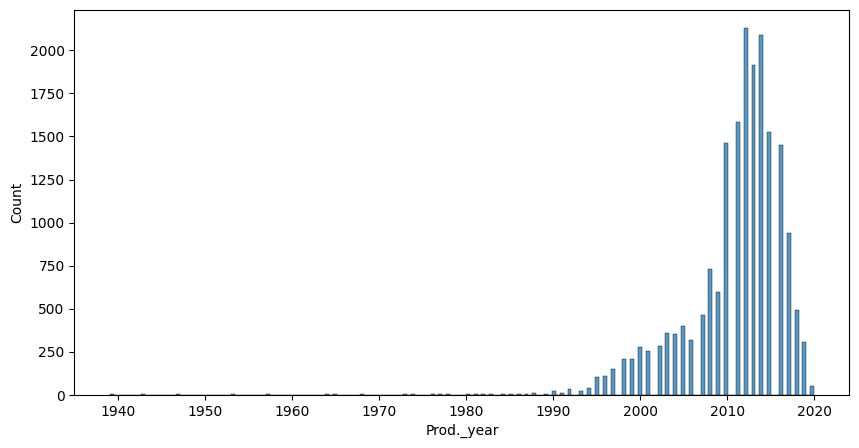

In [31]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod._year'])

Більшість автомобілів є в межах 2010 - 2020 років випуску, але присутні і дуже старі автомобілі.

Text(0.5, 1.0, 'Number of colors')

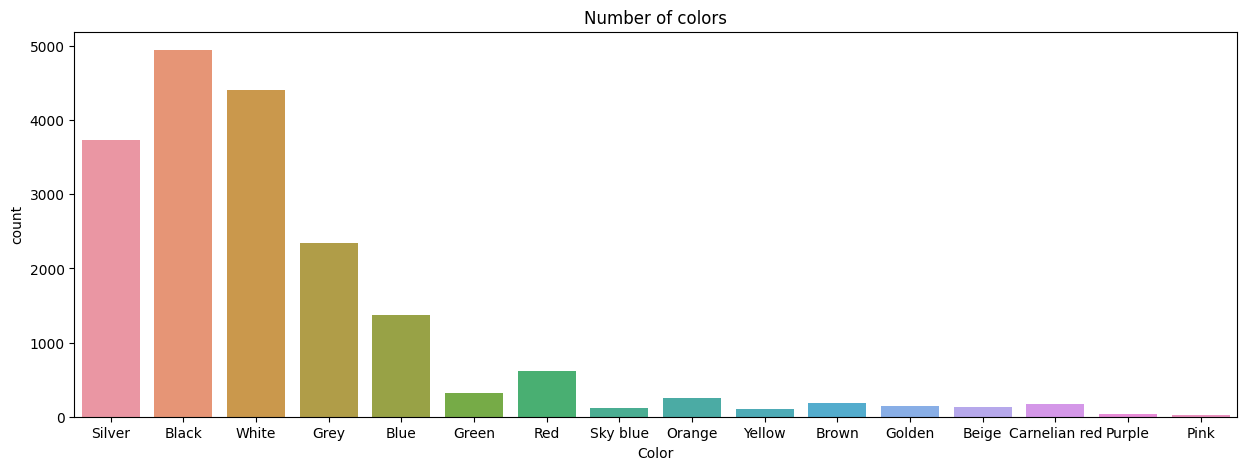

In [32]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("Number of colors")

<Axes: xlabel='Doors', ylabel='count'>

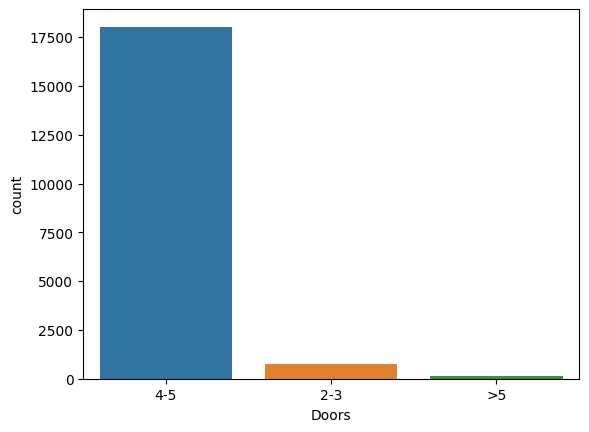

In [33]:
sns.countplot(data=df, x='Doors')

У більшості автомобілів є 4-5 дверей.

***Видалення автомобілів із датасету, вартість яких нижча 500$:***

In [34]:
df = df[df['Price'] > 500]
df

,ID,Price,Levy,Manufacturer,Model,Prod._year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4-5,Left wheel,Grey,12
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


***Оновлення нумерації індексів відповідно до кінцевого набору даних :***

In [35]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,ID,Price,Levy,Manufacturer,Model,Prod._year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4-5,Left wheel,Grey,12
17285,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5
17286,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
17287,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


***Заповнення усіх нульових значень у стовпці "Levy" медіанним значенням:***

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17289.0,4.560482e+07,7.495876e+05,24367759.0,45718308.0,45774305.0,45802039.0,4.581665e+07
Price,17289.0,2.032096e+04,2.009294e+05,549.0,7683.0,14426.0,23521.0,2.630750e+07
Levy,17289.0,6.207673e+02,5.648260e+02,0.0,0.0,642.0,891.0,1.171400e+04
Prod._year,17289.0,2.010853e+03,5.672887e+00,1943.0,2009.0,2012.0,2015.0,2.020000e+03
Engine_volume,17289.0,2.286032e+00,8.581966e-01,0.0,1.8,2.0,2.5,2.000000e+01
Mileage,17289.0,1.497682e+06,4.763519e+07,0.0,70042.0,124912.0,185302.0,2.147484e+09
Cylinders,17289.0,4.553936e+00,1.184065e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,17289.0,6.469605e+00,4.203895e+00,0.0,4.0,4.0,12.0,1.600000e+01


In [37]:
levy_nulls = df[df['Levy'] == 0]
levy_nulls

,ID,Price,Levy,Manufacturer,Model,Prod._year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
9,45756839,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
11,45814819,8781,0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8.0,Manual,Rear,2-3,Left wheel,Blue,0
12,45815568,3000,0,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000,4.0,Manual,Front,4-5,Left wheel,White,4
23,45814106,7840,0,FORD,Transit,2001,Microbus,No,Diesel,2.0,230000,4.0,Manual,Front,2-3,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17276,45776906,15681,0,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Petrol,2.5,81200,5.0,Manual,Front,4-5,Left wheel,Silver,12
17278,44571028,8781,0,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,4-5,Left wheel,Blue,4
17279,45768089,19130,0,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,4-5,Left wheel,Black,12
17281,45796788,7840,0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.0,220000,6.0,Tiptronic,Rear,4-5,Right-hand drive,White,0


<Axes: xlabel='Levy', ylabel='Density'>

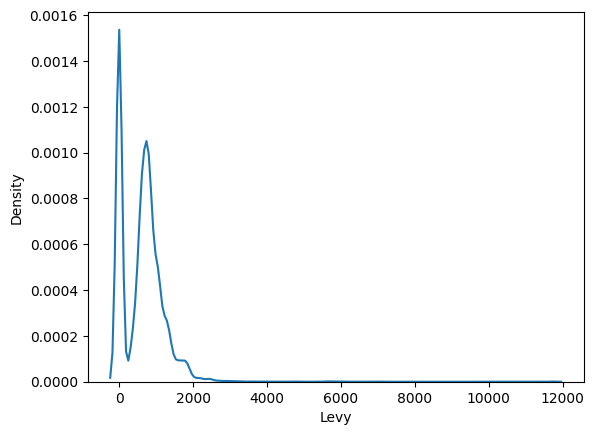

In [38]:
sns.kdeplot(df['Levy'])

In [39]:
median_levy = df['Levy'].median()

In [40]:
df['Levy'] = df['Levy'].replace(0, median_levy)

<Axes: xlabel='Levy', ylabel='Density'>

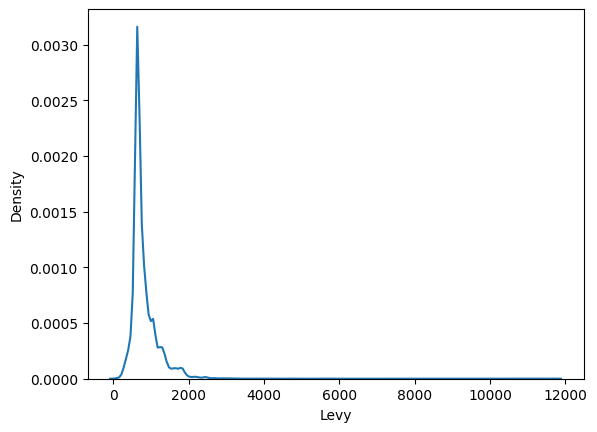

In [41]:
sns.kdeplot(df['Levy'])

***Обробка викидів шляхом заміни їх нижньою та верхньою межами:***

In [42]:
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data

# отримання стовпців з неперервними значеннями
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [43]:
df = handling_outliers(df, get_continus_columns(df))

In [44]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

##### Побудова Machine Learning моделей

In [45]:
X = df.drop(['Price'], axis=1).values
y = df['Price'].values
X = MinMaxScaler().fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [47]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)
dt  = DecisionTreeRegressor(max_depth = 12)
rf  = RandomForestRegressor(n_estimators=100, max_features= 8)
ada = AdaBoostRegressor( n_estimators=134, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

Linear Regression : 31 %
-----------------------------------------
K Nearest Neighbours : 68 %
-----------------------------------------
Decision Tree : 67 %
-----------------------------------------
Random Forest : 83 %
-----------------------------------------
AdaBoost : 41 %
-----------------------------------------
Gradient Boosting Regressor : 84 %
-----------------------------------------
XGBRegressor : 84 %
-----------------------------------------


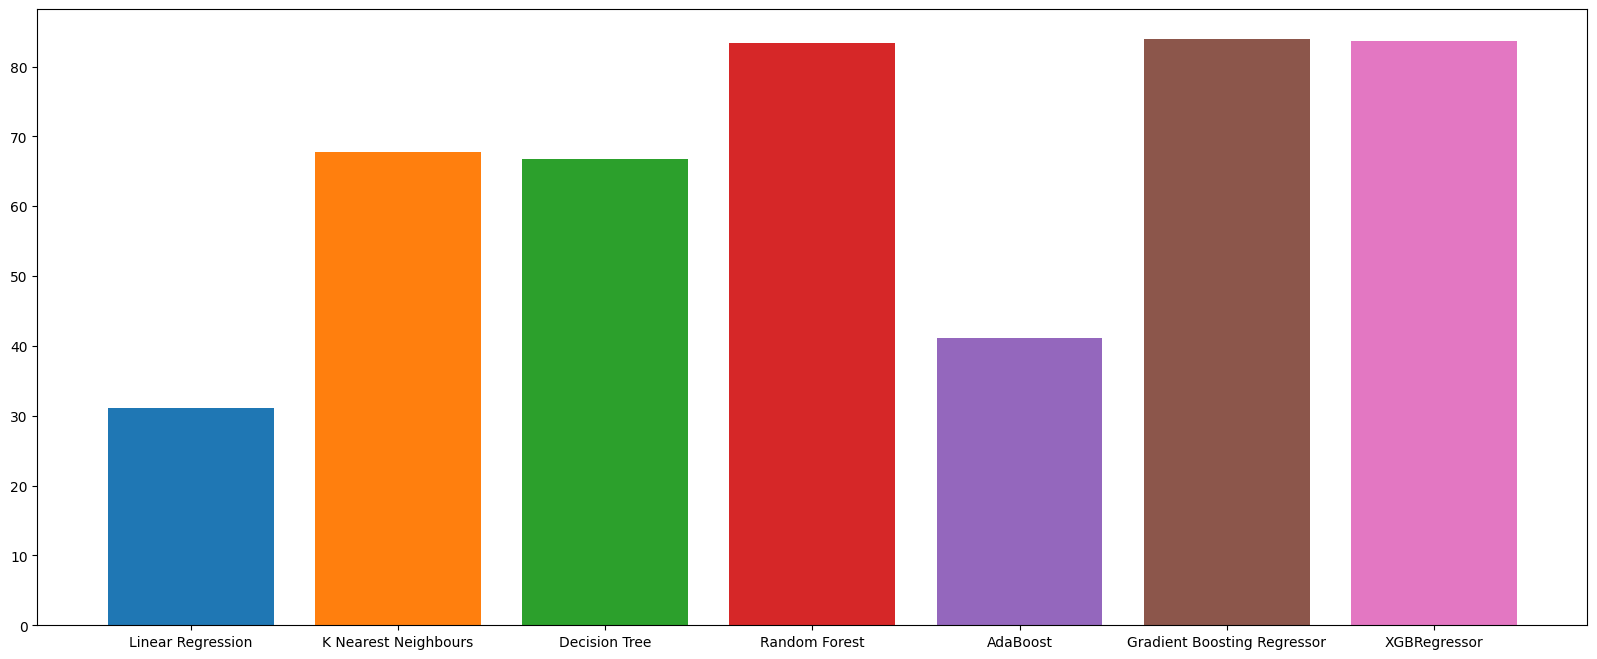

In [48]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
            
    print(f'{regressor_name} : {round(accuracy)} %')
    print('-----------------------------------------')

    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

### Report

Для побудови моделі машинного навчання для прогнозування ціни на автомобілі мною на сайті https://www.kaggle.com був вибраний датасет "Car Price Prediction".

Завантаживши даний датасет було проведено оцінку якості даних та їх попередню обробку, а саме:  
 
    1. Пошук і видалення повторюваних рядків; 
    2. Стандартизація найменувань стовпців;
    3. Пертворення усіх значень "-" на "0" у стовпці "Levy" а також перетворення типу даних у цілочисельний;
    4. Заповнення усіх нульових значень у стовпці "Levy" медіанним значенням;
    5. Видалення 'turbo' після кожного значення у стовпці "Engine_volume" і перетворення типу даних у тип дійсних чисел;
    6. Видалення 'km' після кожного значення у стовпці "Mileage" і перетворення типу даних у цілочисельний;
    7. Перетворення значень '02-Mar' на '2-3', і '04-May' на '4-5' у стовпці "Door";

Провівши аналіз даних було встановлено, що:

    1. Значення у стовпці "Levy" (збір, податок) знаходяться в діапазоні 0 і 2000$;
    2. Найбільше автомобілів є типу Седан, Джип і Хетчбек;
    3. У більшості автомобілів подушок безпеки є в межах 3-5 або 11-13.
    4. Більшість автомобілів є в межах 2010 - 2020 років випуску, але присутні і дуже старі автомобілі.
    5. У більшості автомобілів є 4-5 дверей.
    6. Виявлено, що у частини автомобілів, з невеликим пробігом і віком була аномально низька вартість від 0 до кілька десятків чи кілька сотень доларів.
       Тому були видалені всі авто із вказаною вартістю менше 500 дол.
    7. Проведена обробка викидів шляхом заміни їх нижньою та верхньою межами.

Далі було проведено розбиття даних на тренувальну та тестову вибірки.

Для побудови моделей для навчання було вибрано наступні алгоритми:

    1. LinearRegression
    2. KNeighborsRegressor
    3. DecisionTreeRegressor
    4. RandomForestRegressor
    5. AdaBoostRegressor
    6. GradientBoostingRegressor
    7. XGBRegressor

В результаті навчання моделі найкраще себе показали 3 алгоритми:

    1. RandomForestRegressor       (показник accuracy = 83%)
    2. GradientBoostingRegressor   (показник accuracy = 84%)
    3. XGBRegressor                (показник accuracy = 84%)